# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-04 15:00:10.911949


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/3/20


,11/3/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,9382617,232620,2.48
Brazil,5566049,160496,2.88
India,8313876,123611,1.49
Mexico,938405,92593,9.87
United Kingdom,1077099,47340,4.40
Italy,759829,39412,5.19
France,1461391,37492,2.57


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/3/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
50222,US,9206998,2020-11-01,230999.0,401.0,73594.0,81335.714286
50221,US,9133404,2020-10-31,230598.0,908.0,89126.0,79509.000000
50220,US,9044278,2020-10-30,229690.0,1030.0,99321.0,78738.142857
50219,US,8944957,2020-10-29,228660.0,971.0,88521.0,76513.285714
50218,US,8856436,2020-10-28,227689.0,989.0,78358.0,74110.428571
50217,US,8778078,2020-10-27,226700.0,986.0,73632.0,71884.428571
50216,US,8704446,2020-10-26,225714.0,477.0,66798.0,69987.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/3/20


,11/3/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,513689,33543.0,6.53
Texas,950302,18632.0,1.96
California,945401,17745.0,1.88
Florida,816700,16890.0,2.07
New Jersey,242825,16371.0,6.74
Illinois,436265,10161.0,2.33
Massachusetts,161585,10035.0,6.21


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/3/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1719,California,935878,2020-11-01,17671.0,12.0,3735.0,4183.142857
1718,California,932143,2020-10-31,17659.0,41.0,4115.0,4065.571429
1717,California,928028,2020-10-30,17618.0,59.0,4380.0,4175.571429
1716,California,923648,2020-10-29,17559.0,30.0,4372.0,4326.285714
1715,California,919276,2020-10-28,17529.0,69.0,4388.0,4619.571429
1714,California,914888,2020-10-27,17460.0,74.0,4450.0,4448.857143
1713,California,910438,2020-10-26,17386.0,28.0,3842.0,4399.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/3/20


,11/3/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,311745,7097.0,2.28
Orange,60604,1484.0,2.45
Riverside,69407,1324.0,1.91
San Bernardino,65997,1079.0,1.63
San Diego,57702,901.0,1.56
Sacramento,26716,502.0,1.88
San Joaquin,22167,494.0,2.23


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/3/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5450,Los Angeles,309190,2020-11-01,7074.0,3.0,1572.0,1347.142857
5449,Los Angeles,307618,2020-10-31,7071.0,15.0,1291.0,1240.142857
5448,Los Angeles,306327,2020-10-30,7056.0,12.0,1257.0,1358.000000
5447,Los Angeles,305070,2020-10-29,7044.0,4.0,1701.0,1572.142857
5446,Los Angeles,303369,2020-10-28,7040.0,13.0,1292.0,1840.428571
5445,Los Angeles,302077,2020-10-27,7027.0,27.0,1463.0,1724.000000
5444,Los Angeles,300614,2020-10-26,7000.0,7.0,854.0,1606.857143
5443,Los Angeles,299760,2020-10-25,6993.0,4.0,823.0,1615.571429
5442,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000
5441,Los Angeles,296821,2020-10-23,6974.0,18.0,2756.0,1371.285714



7 day new US cases as of 11/3/20


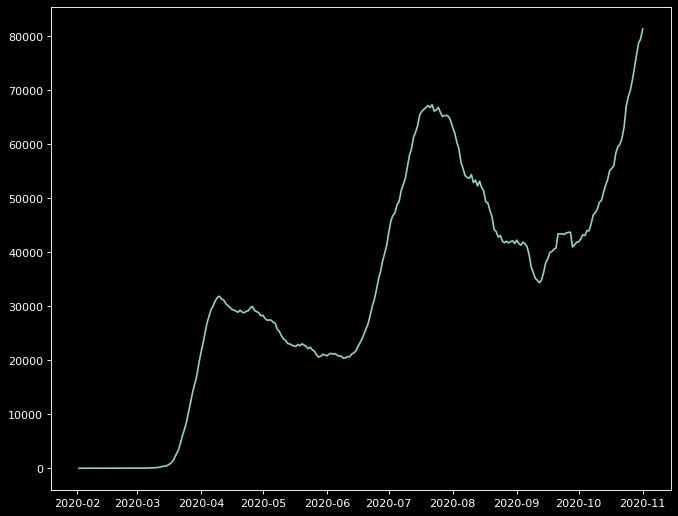

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/3/20


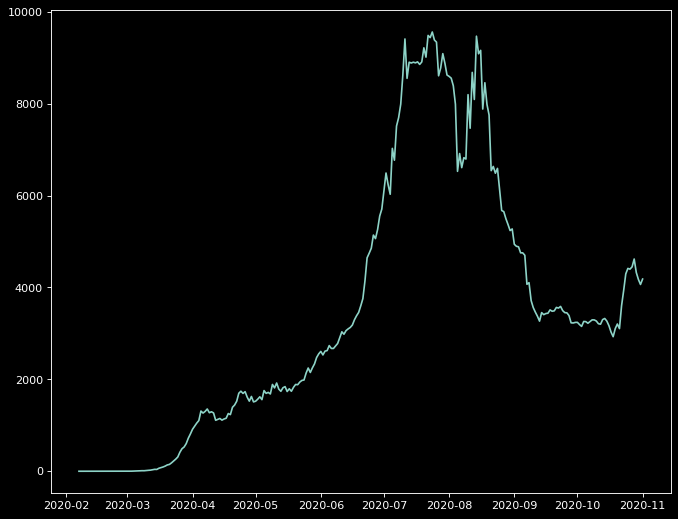

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/3/20


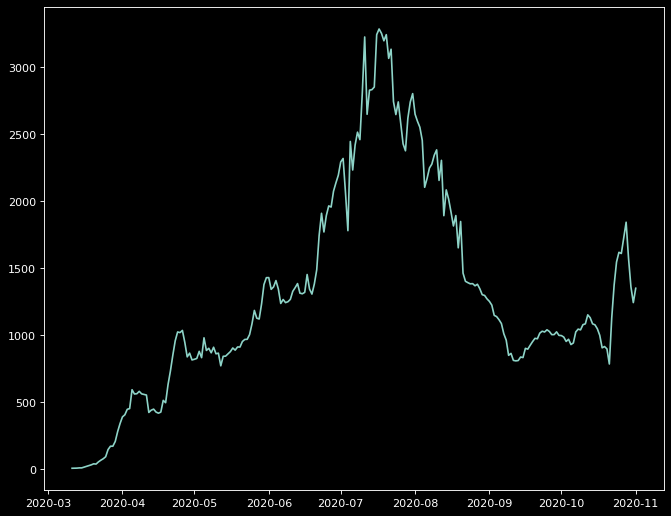

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()